## 1. Introduction

## Osteoporosis Risk Prediction

### Project Overview
The goal of this project is to predict osteoporosis risk using a dataset of patients' medical records. Osteoporosis is a condition that weakens bones, increasing the likelihood of fractures, often diagnosed after minor falls or impacts. It predominantly affects older individuals.

### Dataset Description
The dataset provides comprehensive health information influencing osteoporosis development, including demographics, lifestyle choices, medical history, and bone health indicators. It supports research in osteoporosis prediction, aiding machine learning models in identifying at-risk individuals. Factors such as age, gender, hormonal changes, and lifestyle habits are analyzed to enhance osteoporosis management and prevention strategies.

### Data Dictionary
| Column                          | Description                                         |
|---------------------------------|-----------------------------------------------------|
| ID                              | Unique identifier for each patient                   |
| Age                             | Patient's age                                       |
| Gender                          | Patient's gender                                    |
| Hormonal Changes                | Indicates hormonal changes in the patient           |
| Family History with Osteoporosis| Indicates family history of osteoporosis            |
| Race/Ethnicity                  | Patient's race or ethnicity                         |
| Body Weight                     | Patient's weight details                            |
| Calcium                         | Calcium levels in the patient's body                |
| Vitamin D                       | Vitamin D levels in the patient's body              |
| Physical Activity               | Details of physical activity                        |
| Smoking                         | Indicates whether the patient smokes                |
| Alcohol Consumption             | Indicates whether the patient consumes alcohol      |
| Medical Conditions              | Patient's medical conditions                       |
| Medication                      | Details of medications                             |
| Prior Fracture                  | Indicates whether the patient has had a prior fracture |
| Osteoporosis                    | Indicates whether the patient has osteoporosis      |

### Potential analysis.

1. **Predictive Modeling:** Develop machine learning models to predict osteoporosis probability based on provided features.
   
2. **Feature Importance Analysis:** Determine which features significantly impact osteoporosis risk.

3. **Correlation Analysis:** Explore correlations between features and osteoporosis risk to identify potential risk factors.

4. **Subgroup Analysis:** Analyze variations in osteoporosis risk across demographics, lifestyles, and medical histories to tailor prevention strategies.

5. **Model Interpretation:** Interpret models to understand how features contribute to osteoporosis risk, aiding informed healthcare decisions.

This project aims to improve osteoporosis prediction and management through data-driven insights.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv("./data/osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


## 2. Data Preprocessing

### Shape of Dataset

In [3]:
df.shape

(1958, 16)

### Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

### Drop unnecessary columns

In [5]:
# Drop the id column as it is not important in the dataset
df = df.drop(['Id'], axis=1)

### Missing values

In [6]:
# Columns with missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [7]:
# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Age                     0.000000
Gender                  0.000000
Hormonal Changes        0.000000
Family History          0.000000
Race/Ethnicity          0.000000
Body Weight             0.000000
Calcium Intake          0.000000
Vitamin D Intake        0.000000
Physical Activity       0.000000
Smoking                 0.000000
Alcohol Consumption    50.459653
Medical Conditions     33.043922
Medications            50.306435
Prior Fractures         0.000000
Osteoporosis            0.000000
dtype: float64


Alcohol Consumption and Medications columns have more than 50% missing values. I will replace these missing values with "None" as it is possible that the patient does not consume alcohol or take any medications. The same approach will be applied to the Medical Conditions column.

In [8]:
# Replace missing values with "None"
df.fillna("None",inplace=True)

### Drop Duplicates

In [9]:
df.drop_duplicates()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,None,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,None,None,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,None,Hyperthyroidism,None,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,Yes,0


### Data Proportion

In [10]:
# Data counting and proportion function
def dist(df,target):
    count= df[target].value_counts(normalize=False).sort_values()
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(4)})
    return dist

In [11]:
# View the count and proportion of the data
for i in df.columns:
    print(' '*7,i.upper())
    print(dist(df,i))
    print("*"*23)

        AGE
     Freq[N]  Prop[%]
Age                  
18       152   0.0776
19       147   0.0751
20       109   0.0557
21       117   0.0598
22        99   0.0506
..       ...      ...
86        14   0.0072
87        13   0.0066
88         9   0.0046
89        13   0.0066
90         9   0.0046

[73 rows x 2 columns]
***********************
        GENDER
        Freq[N]  Prop[%]
Gender                  
Female      966   0.4934
Male        992   0.5066
***********************
        HORMONAL CHANGES
                  Freq[N]  Prop[%]
Hormonal Changes                  
Normal                981    0.501
Postmenopausal        977    0.499
***********************
        FAMILY HISTORY
                Freq[N]  Prop[%]
Family History                  
No                  998   0.5097
Yes                 960   0.4903
***********************
        RACE/ETHNICITY
                  Freq[N]  Prop[%]
Race/Ethnicity                    
African American      681   0.3478
Asian               

## 3. Exploratory Data Analysis

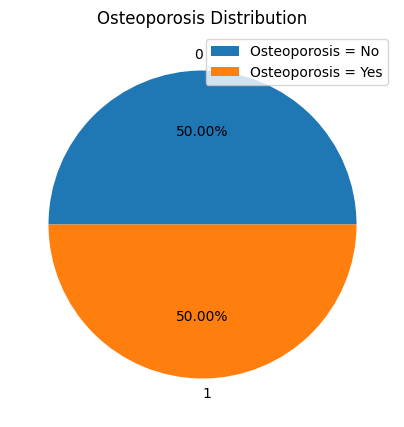

In [12]:
labels, counts = np.unique(df.Osteoporosis, return_counts=True)

plt.figure(figsize=(5, 5))
plt.pie(counts, autopct='%1.2f%%', labels=labels)
plt.legend(['Osteoporosis = No', 'Osteoporosis = Yes'])
plt.title('Osteoporosis Distribution')

plt.show()


The pie chart shows that 50% of the patients have osteoporosis (Yes) and 50% do not (No). This balanced distribution has several implications for the predictive model:

1. **Model Training**: A balanced dataset helps in training a model without bias towards one class, leading to better performance and generalization.

2. **Evaluation Metrics**: Metrics like accuracy, precision, recall, and F1-score will be more meaningful, providing a clearer picture of the model's performance.

3. **Overfitting**: Ensure the model does not overfit by using regularization techniques, cross-validation, and careful hyperparameter tuning.

4. **Feature Importance**: The balanced dataset allows for reliable analysis of feature importance, aiding in model interpretation and decision-making.


### Distribution of osteoporosis by age and gender

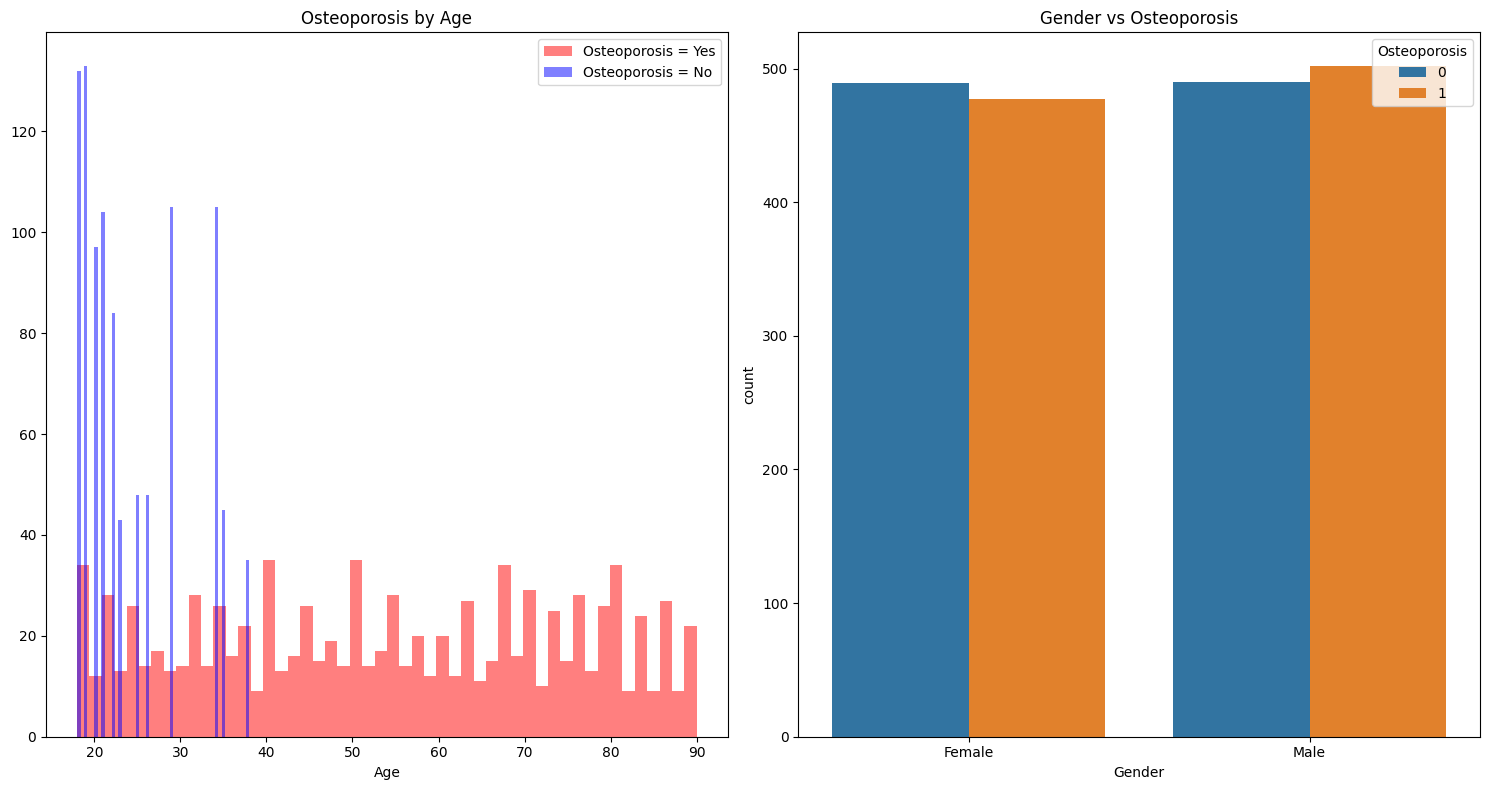

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1
axs[0].hist(df[df['Osteoporosis']==1]['Age'], bins=50, alpha=0.5, color='red', label='Osteoporosis = Yes')
axs[0].hist(df[df['Osteoporosis']==0]['Age'], bins=50, alpha=0.5, color='blue', label='Osteoporosis = No')
axs[0].legend()
axs[0].set_xlabel('Age')
axs[0].set_title('Osteoporosis by Age')

# Plot 2
sns.countplot(x='Gender', data=df, hue='Osteoporosis', ax=axs[1])
axs[1].set_title('Gender vs Osteoporosis')

plt.tight_layout()
plt.show()

In the first graph, the relationship between age and the occurrence of osteoporosis is shown. It is evident that the disease occurs across the age range presented in the dataset. However, individuals under 40 years of age have a significantly lower risk, as indicated by the higher count of negative cases in this age group.

Regarding gender, the men in this sample exhibit a higher occurrence of osteoporosis. Nonetheless, there is no significant difference to conclude that gender is a determinant factor in the occurrence of the disease

### Hormonal Changes and Osteoporosis

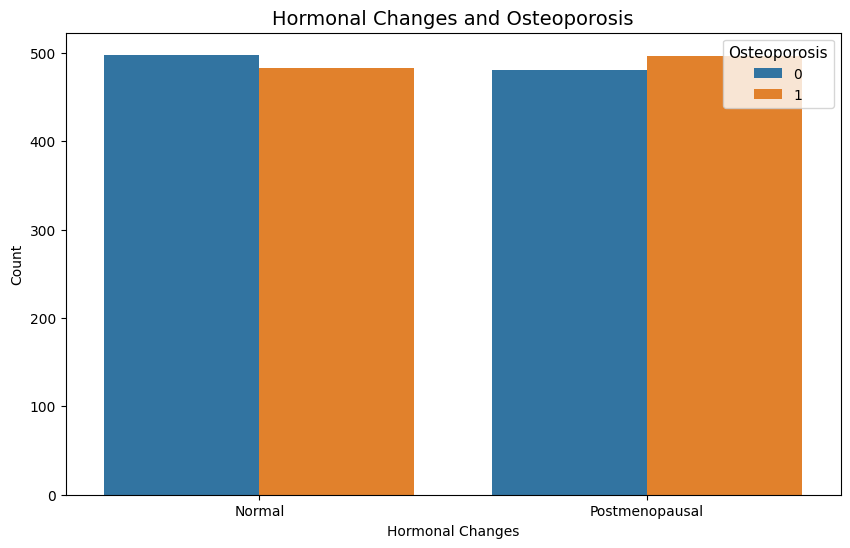

In [14]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Hormonal Changes', data=df, hue='Osteoporosis')
plt.title('Hormonal Changes and Osteoporosis', fontsize=14)
plt.xlabel('Hormonal Changes', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Osteoporosis', title_fontsize='11', fontsize='10')

plt.show()


In terms of hormonal changes, a small difference can be observed between individuals with minor or normal hormonal changes and those who are postmenopausal. The latter group presents a greater risk of developing osteoporosis due to the decrease in estrogen and the changes in calcium metabolism characteristic of this hormonal condition.

### Family History and Ethnicity

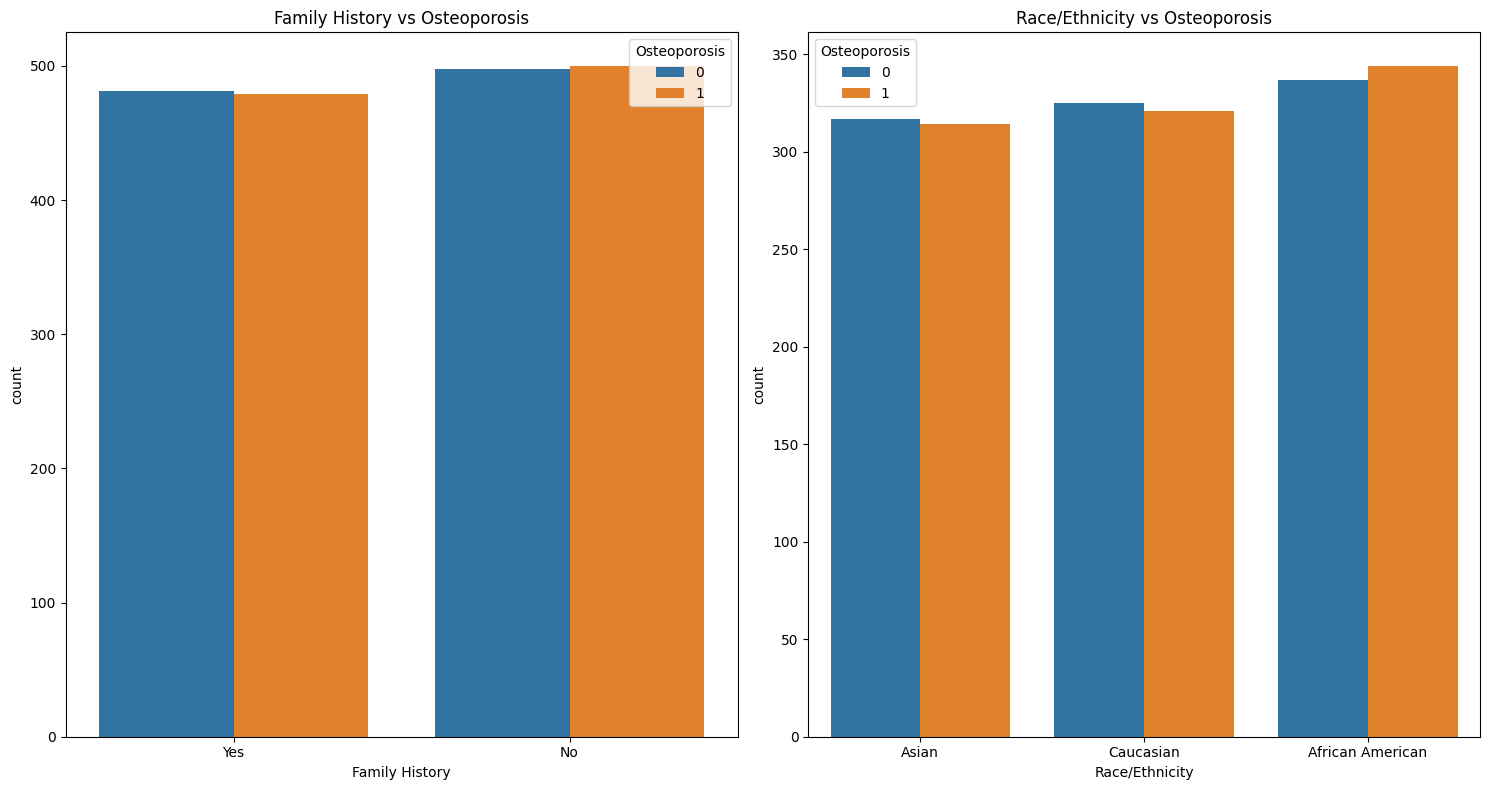

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1
sns.countplot(x='Family History', data=df, hue='Osteoporosis', ax=axs[0])
axs[0].set_title('Family History vs Osteoporosis')

# Plot 2
sns.countplot(x='Race/Ethnicity', data=df, hue='Osteoporosis', ax=axs[1])
axs[1].set_title('Race/Ethnicity vs Osteoporosis')

plt.tight_layout()
plt.show()

As for family history and ethnicity, characteristics that could be considered genetic, there is no clear relationship indicating that osteoporosis is an inherited disease, either through family presence or the characteristic features of each ethnicity.

### Body Weight and Vitamin Intake

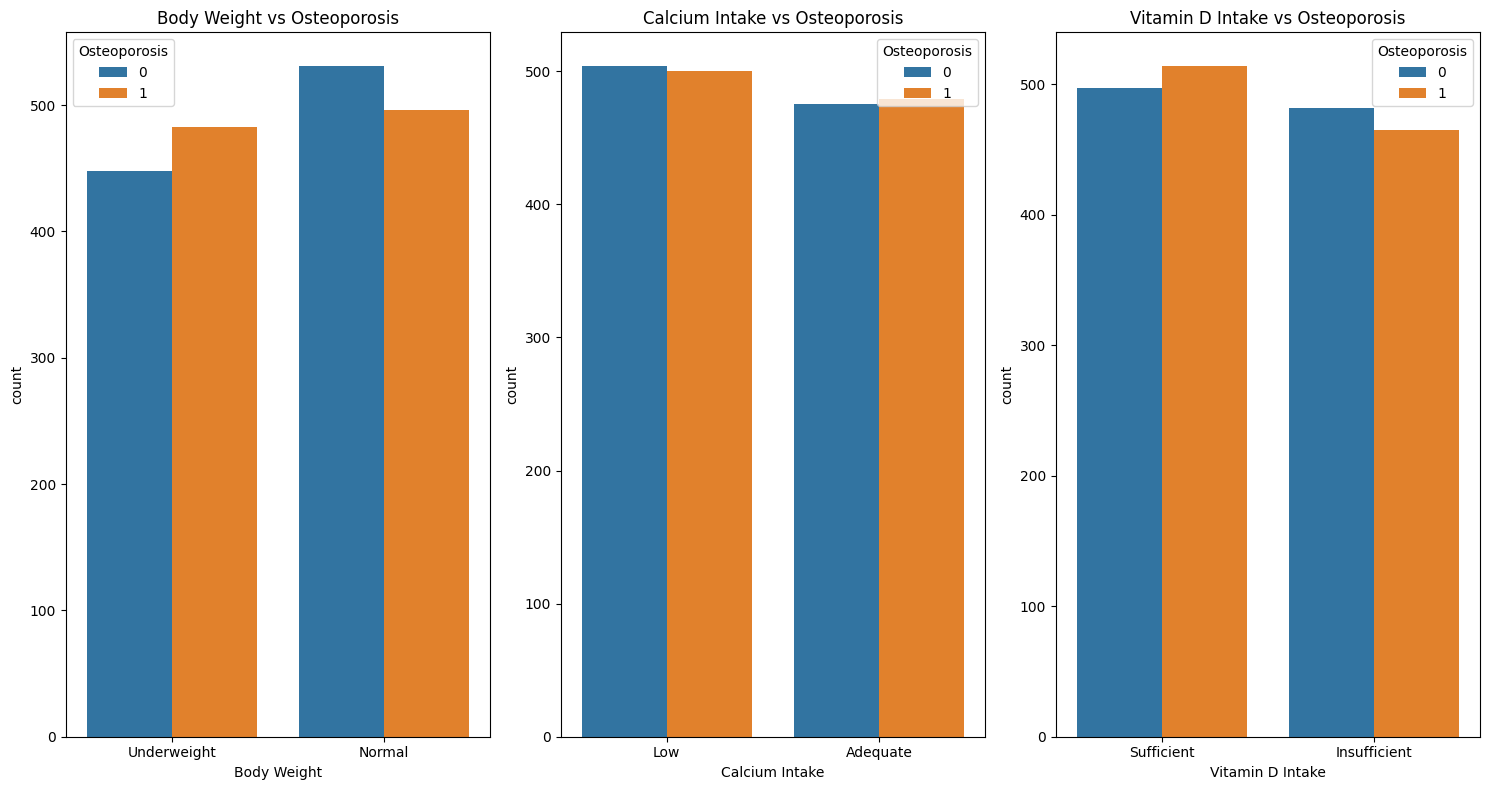

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Plot 1
sns.countplot(x='Body Weight', data=df, hue='Osteoporosis', ax=axs[0])
axs[0].set_title('Body Weight vs Osteoporosis')

# Plot 2
sns.countplot(x='Calcium Intake', data=df, hue='Osteoporosis', ax=axs[1])
axs[1].set_title('Calcium Intake vs Osteoporosis')

# Plot 3
sns.countplot(x='Vitamin D Intake', data=df, hue='Osteoporosis', ax=axs[2])
axs[2].set_title('Vitamin D Intake vs Osteoporosis')


plt.tight_layout()
plt.show()

Analyzing the aforementioned parameters, there is a significant difference in the occurrence of osteoporosis in individuals who are underweight. Additionally, the consumption of calcium and vitamin D does not present a significant difference in the occurrence of osteoporosis.

### Lifestyle and Osteoporosis

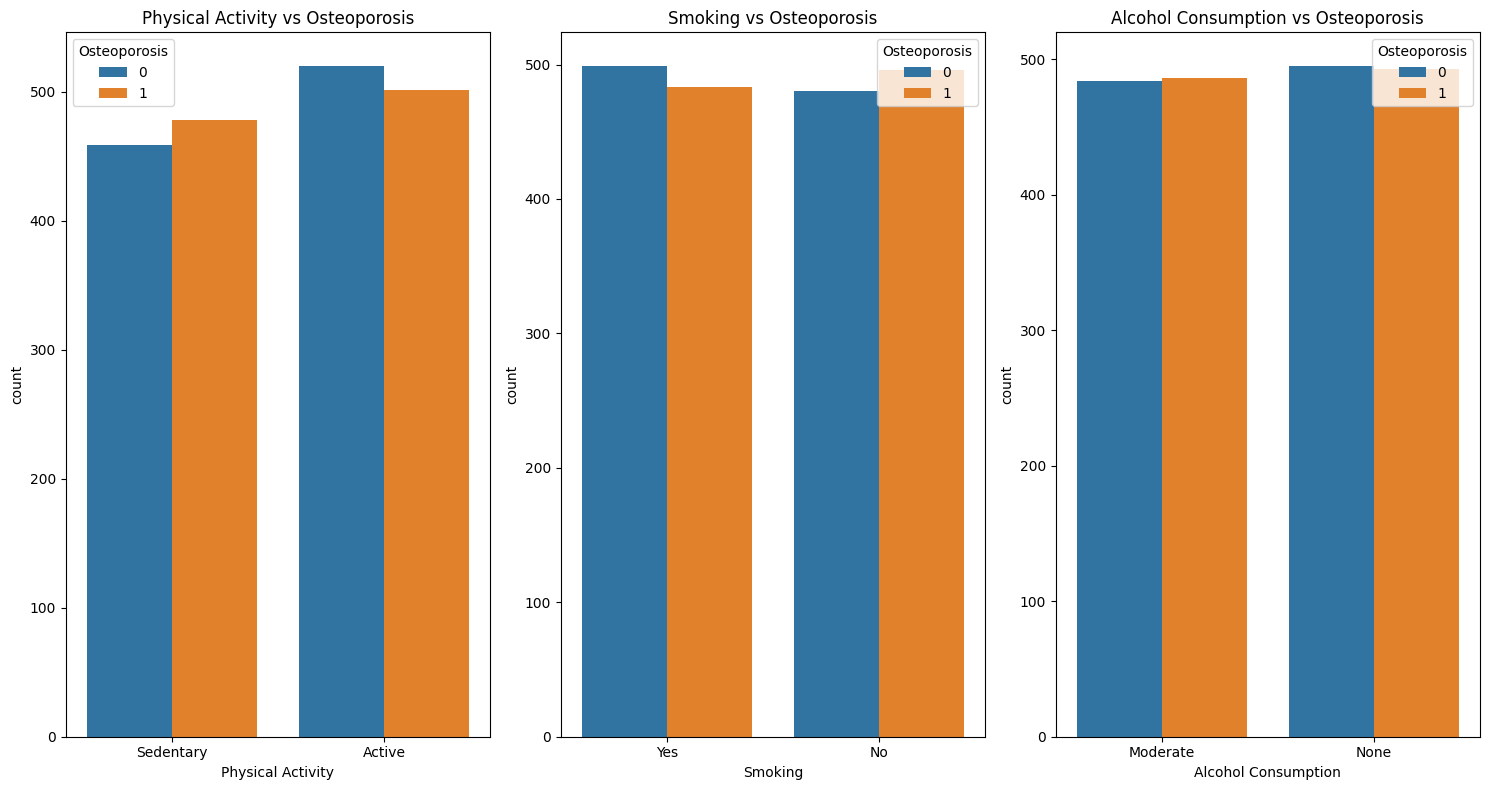

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Plot 1
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis', ax=axs[0])
axs[0].set_title('Physical Activity vs Osteoporosis')

# Plot 2
sns.countplot(x='Smoking', data=df, hue='Osteoporosis', ax=axs[1])
axs[1].set_title('Smoking vs Osteoporosis')

# Plot 3
sns.countplot(x='Alcohol Consumption', data=df, hue='Osteoporosis', ax=axs[2])
axs[2].set_title('Alcohol Consumption vs Osteoporosis')


plt.tight_layout()
plt.show()

On the other hand, alcohol consumption and smoking do not show a significant difference in the occurrence of osteoporosis. However, it can be observed that sedentary individuals tend to present the disease more frequently, although this difference does not provide evident causality.

### Medical History and Osteoporosis

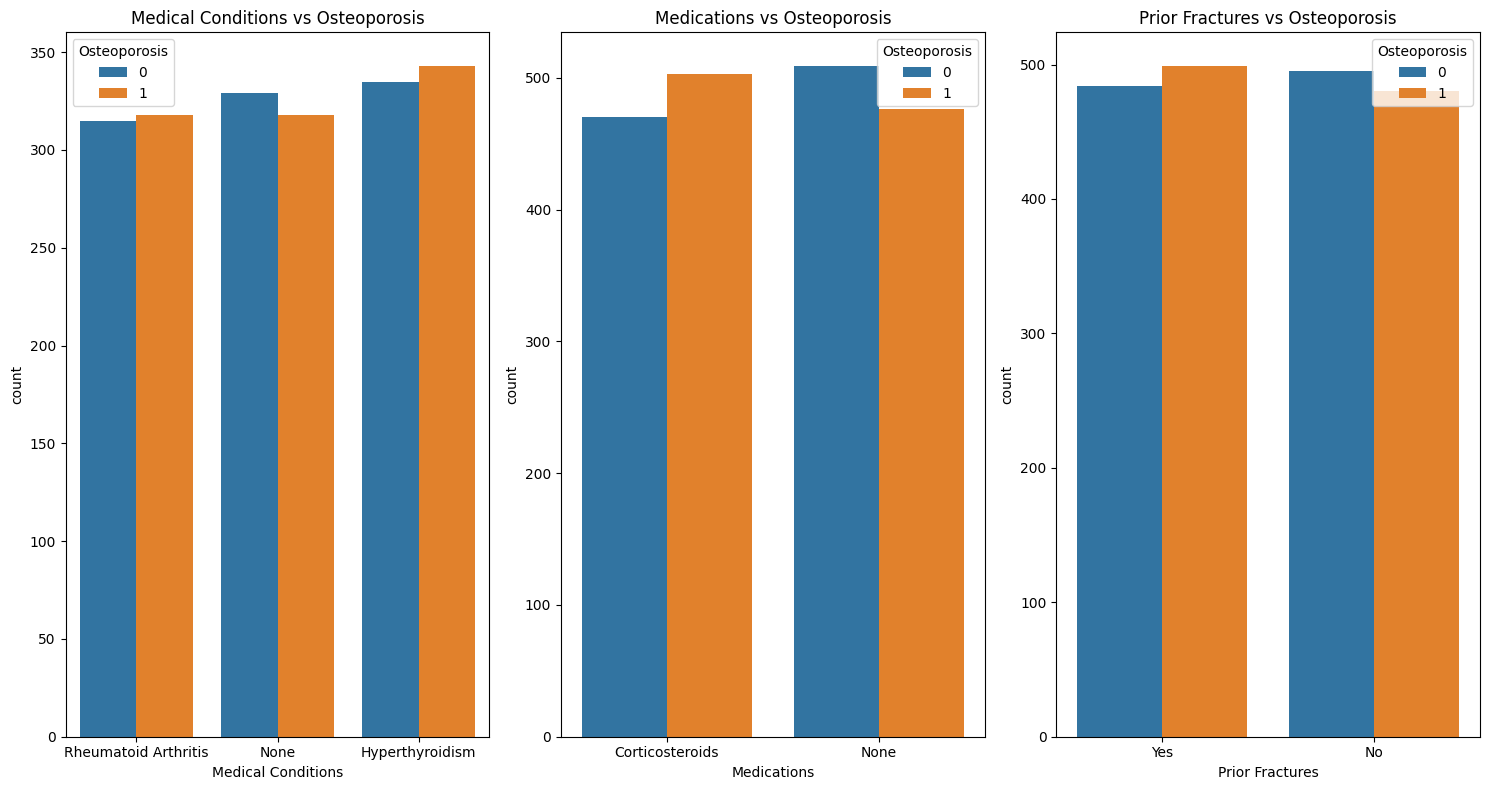

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Plot 1
sns.countplot(x='Medical Conditions', data=df, hue='Osteoporosis', ax=axs[0])
axs[0].set_title('Medical Conditions vs Osteoporosis')

# Plot 2
sns.countplot(x='Medications', data=df, hue='Osteoporosis', ax=axs[1])
axs[1].set_title('Medications vs Osteoporosis')

# Plot 3
sns.countplot(x='Prior Fractures', data=df, hue='Osteoporosis', ax=axs[2])
axs[2].set_title('Prior Fractures vs Osteoporosis')


plt.tight_layout()
plt.show()

Finally, regarding medical conditions, it can be observed that people who have suffered from hyperthyroidism or who have had a generalized consumption of corticosteroids have a higher probability of having osteoporosis.

## 4. Data Preparation for Classification

### Label encoding of categorical variables

In [19]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

In [20]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(col, ":", df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


### Correlation Matrix

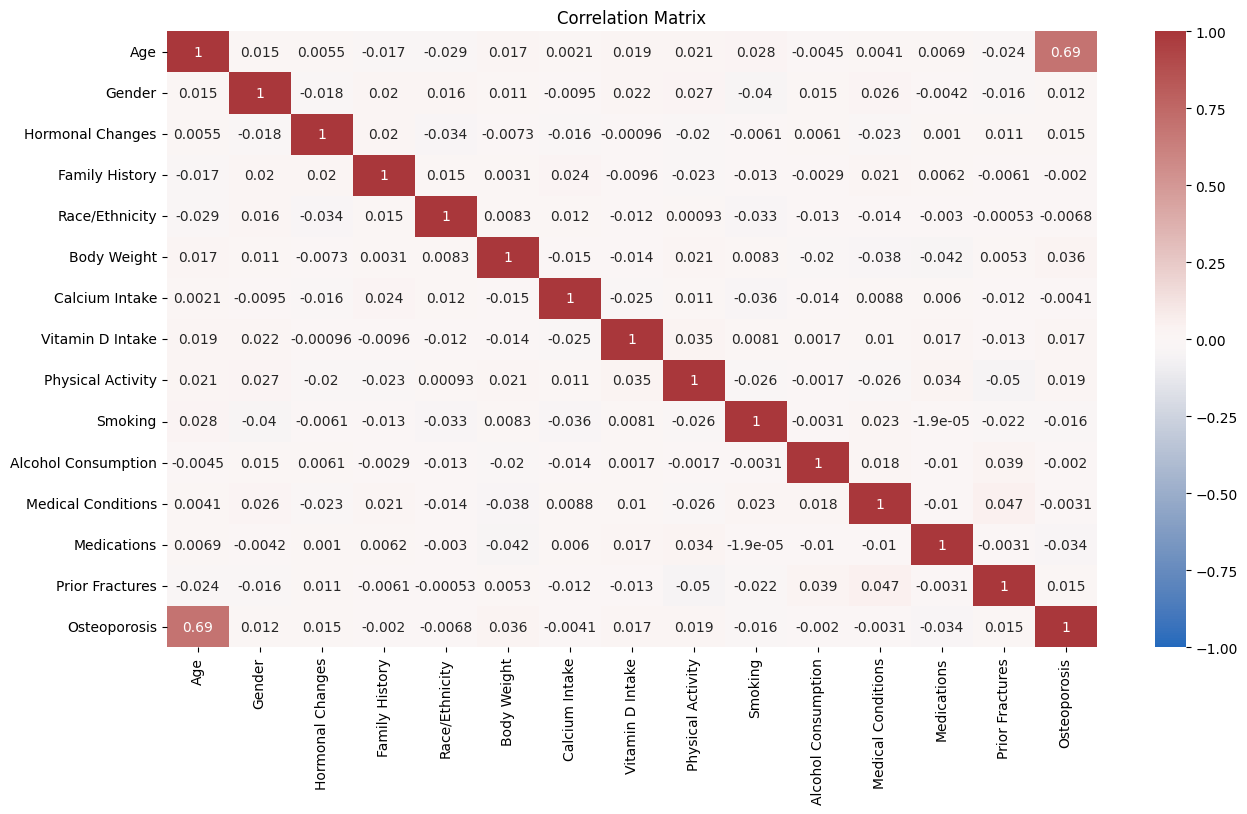

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='vlag')
plt.title('Correlation Matrix')
plt.show()

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop('Osteoporosis', axis=1)
y = df.Osteoporosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Modeling algorithms

The following modeling algorithms will be used for the prediction of the occurrence of osteoporosis:

- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbor (KNN)
- Support Vector (SVC)
- Gradient Boosting

### Import Libraries

In [23]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [24]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1 Logistic Regression

In [25]:
# Grid parameters for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 2000]
}

# Grid search with Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(),
                              param_grid=param_grid_lr,
                              scoring='accuracy',
                              cv=5,
                              verbose=0,
                              n_jobs=-1)

# Fit the scaled data
grid_search_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [26]:
# Best parameters for Logistc Legression
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

# Results
print(f'Best parameters found: {grid_search_lr.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_lr.best_score_:.4f}')
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Test set accuracy: {test_accuracy_lr:.4f}\n')

Best parameters found: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8453
Test set accuracy: 0.8316



### 5.2 Decision Tree

In [27]:
# Grid parameters for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

#Grid Search
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=param_grid_dt,
                              scoring='accuracy',
                              cv=5,
                              verbose=0,
                              n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
#Best Parameters for Decision Tree
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Results
print(f'Best parameters found: {grid_search_dt.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_dt.best_score_:.4f}')

test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Test set accuracy: {test_accuracy_dt:.4f}\n')

Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8920
Test set accuracy: 0.9048



### 5.3 Random Forest

In [29]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=param_grid_rf,
                              scoring='accuracy',
                              cv=5,
                              verbose=0,
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'gini', 'entropy',
                                       'log_loss'],
                         'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [30]:
#Best Parameters for Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

#Results
print(f'Best parameters found: {grid_search_rf.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_rf.best_score_:.4f}')

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Test set accuracy: {test_accuracy_rf:.4f}\n')

Best parameters found: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 50}
Best cross-validation accuracy: 0.8591
Test set accuracy: 0.8588



### 5.4 KNN

In [31]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10]
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               scoring='accuracy',
                               cv=5,
                               verbose=0,
                               n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [32]:
# Best parameters for KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print(f'Best parameters found: {grid_search_knn.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_knn.best_score_:.4f}')

test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Test set accuracy: {test_accuracy_knn:.4f}\n')

Best parameters found: {'n_neighbors': 10}
Best cross-validation accuracy: 0.7657
Test set accuracy: 0.7721



### 5.5 SVC

In [33]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid_search_svc = GridSearchCV(estimator=SVC(),
                               param_grid=param_grid_svc,
                               scoring='accuracy',
                               cv=5,
                               verbose=0,
                               n_jobs=-1)

grid_search_svc.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [34]:
# Best parameters for SVC
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)

#Results
print(f'Best parameters found: {grid_search_svc.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_svc.best_score_:.4f}')

test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Test set accuracy: {test_accuracy_svc:.4f}\n')

Best parameters found: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.8438
Test set accuracy: 0.8316



### 5.6 Gradient Boosting 

In [35]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                              param_grid=param_grid_gb,
                              scoring='accuracy',
                              cv=5,
                              verbose=0,
                              n_jobs=-1)

grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [36]:
# Best parameters for GB
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

#Results
print(f'Best parameters found: {grid_search_gb.best_params_}')
print(f'Best cross-validation accuracy: {grid_search_gb.best_score_:.4f}')

test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Test set accuracy: {test_accuracy_gb:.4f}\n')

Best parameters found: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation accuracy: 0.9095
Test set accuracy: 0.9201



###

## 6. Model Evaluation

### Test accuracy evaluation

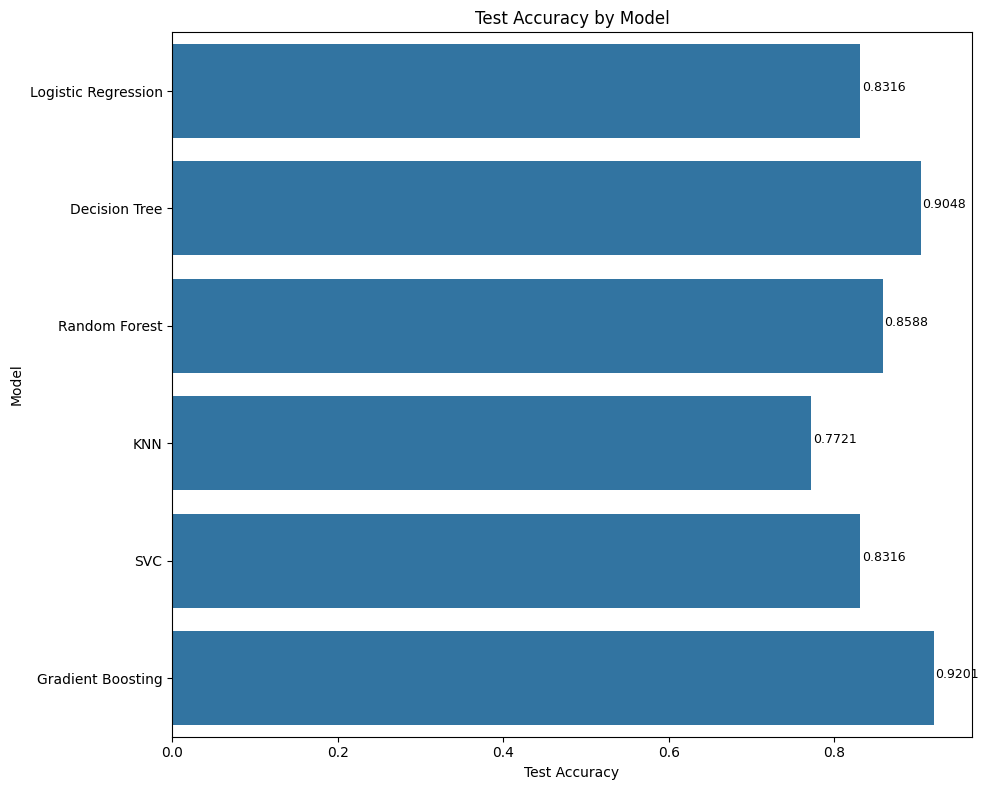

In [37]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Gradient Boosting']
test_accuracies = [test_accuracy_lr, test_accuracy_dt, test_accuracy_rf, test_accuracy_knn, test_accuracy_svc, test_accuracy_gb]

results_df = pd.DataFrame({'Model': models_names, 'Test Accuracy': test_accuracies})

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Test Accuracy', y='Model', data=results_df)
plt.title('Test Accuracy by Model')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')

for index, row in results_df.iterrows():
    barplot.text(row['Test Accuracy'] + 0.002, index, f'{row["Test Accuracy"]:.4f}', color='black', ha="left", fontsize=9)

plt.tight_layout()
plt.show()

### Confusion Matrix

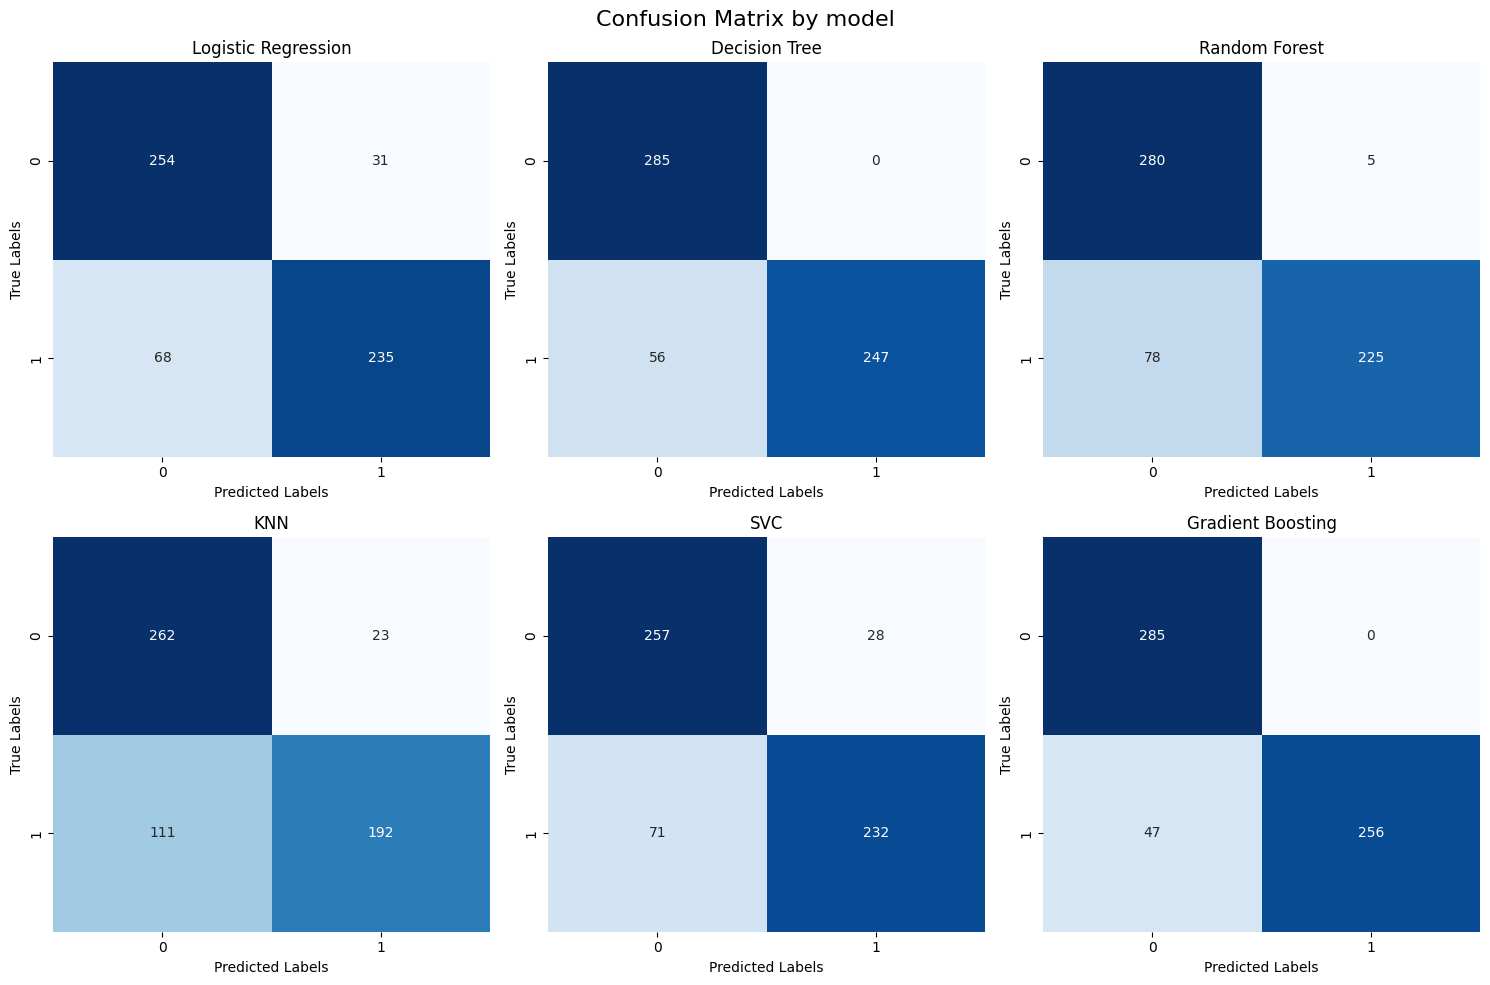

In [38]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix for each model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# List of cms
cms = [cm_lr, cm_dt, cm_rf, cm_knn, cm_svc, cm_gb]


# Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle('Confusion Matrix by model', fontsize=16)
for ax, cm, model_name in zip(axes.flatten(), cms, models_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels', fontsize=10)
    ax.set_ylabel('True Labels', fontsize=10)
    ax.set_xticklabels(['0', '1'])
    ax.set_yticklabels(['0', '1'], va='center')

plt.tight_layout()
plt.show()


### Metrics

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Models and predictions
model_preds = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'SVC': y_pred_svc,
    'Gradient Boosting': y_pred_gb
}

# Metrics
metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

for model_name, y_pred in model_preds.items():
    metrics['Model'].append(model_name)
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-score'].append(f1_score(y_test, y_pred))

# Metrics Dataframe
metrics_df = pd.DataFrame(metrics)

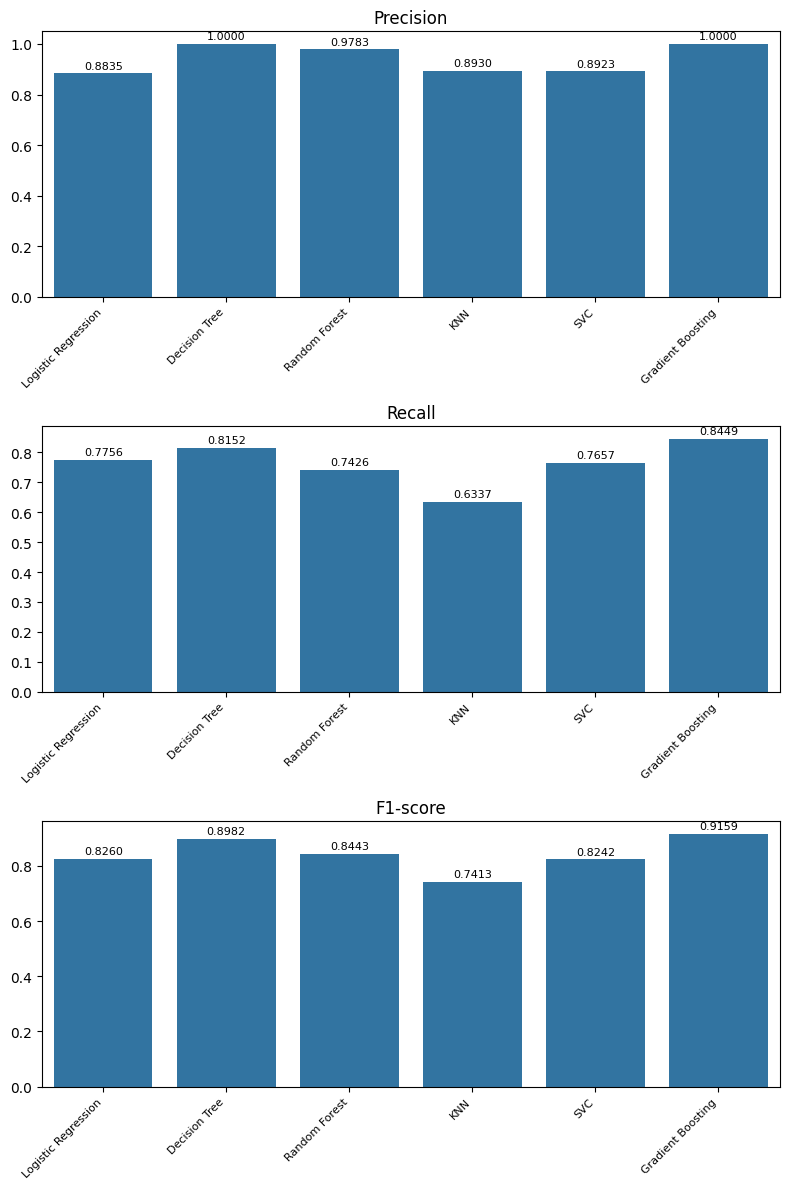

In [40]:
plt.figure(figsize=(8, 12))

# Precision
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['Precision']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# Recall
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['Recall']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# F1-score
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='F1-score', data=metrics_df)
plt.title('F1-score')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['F1-score']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Features Importances

In [41]:
from sklearn.inspection import permutation_importance

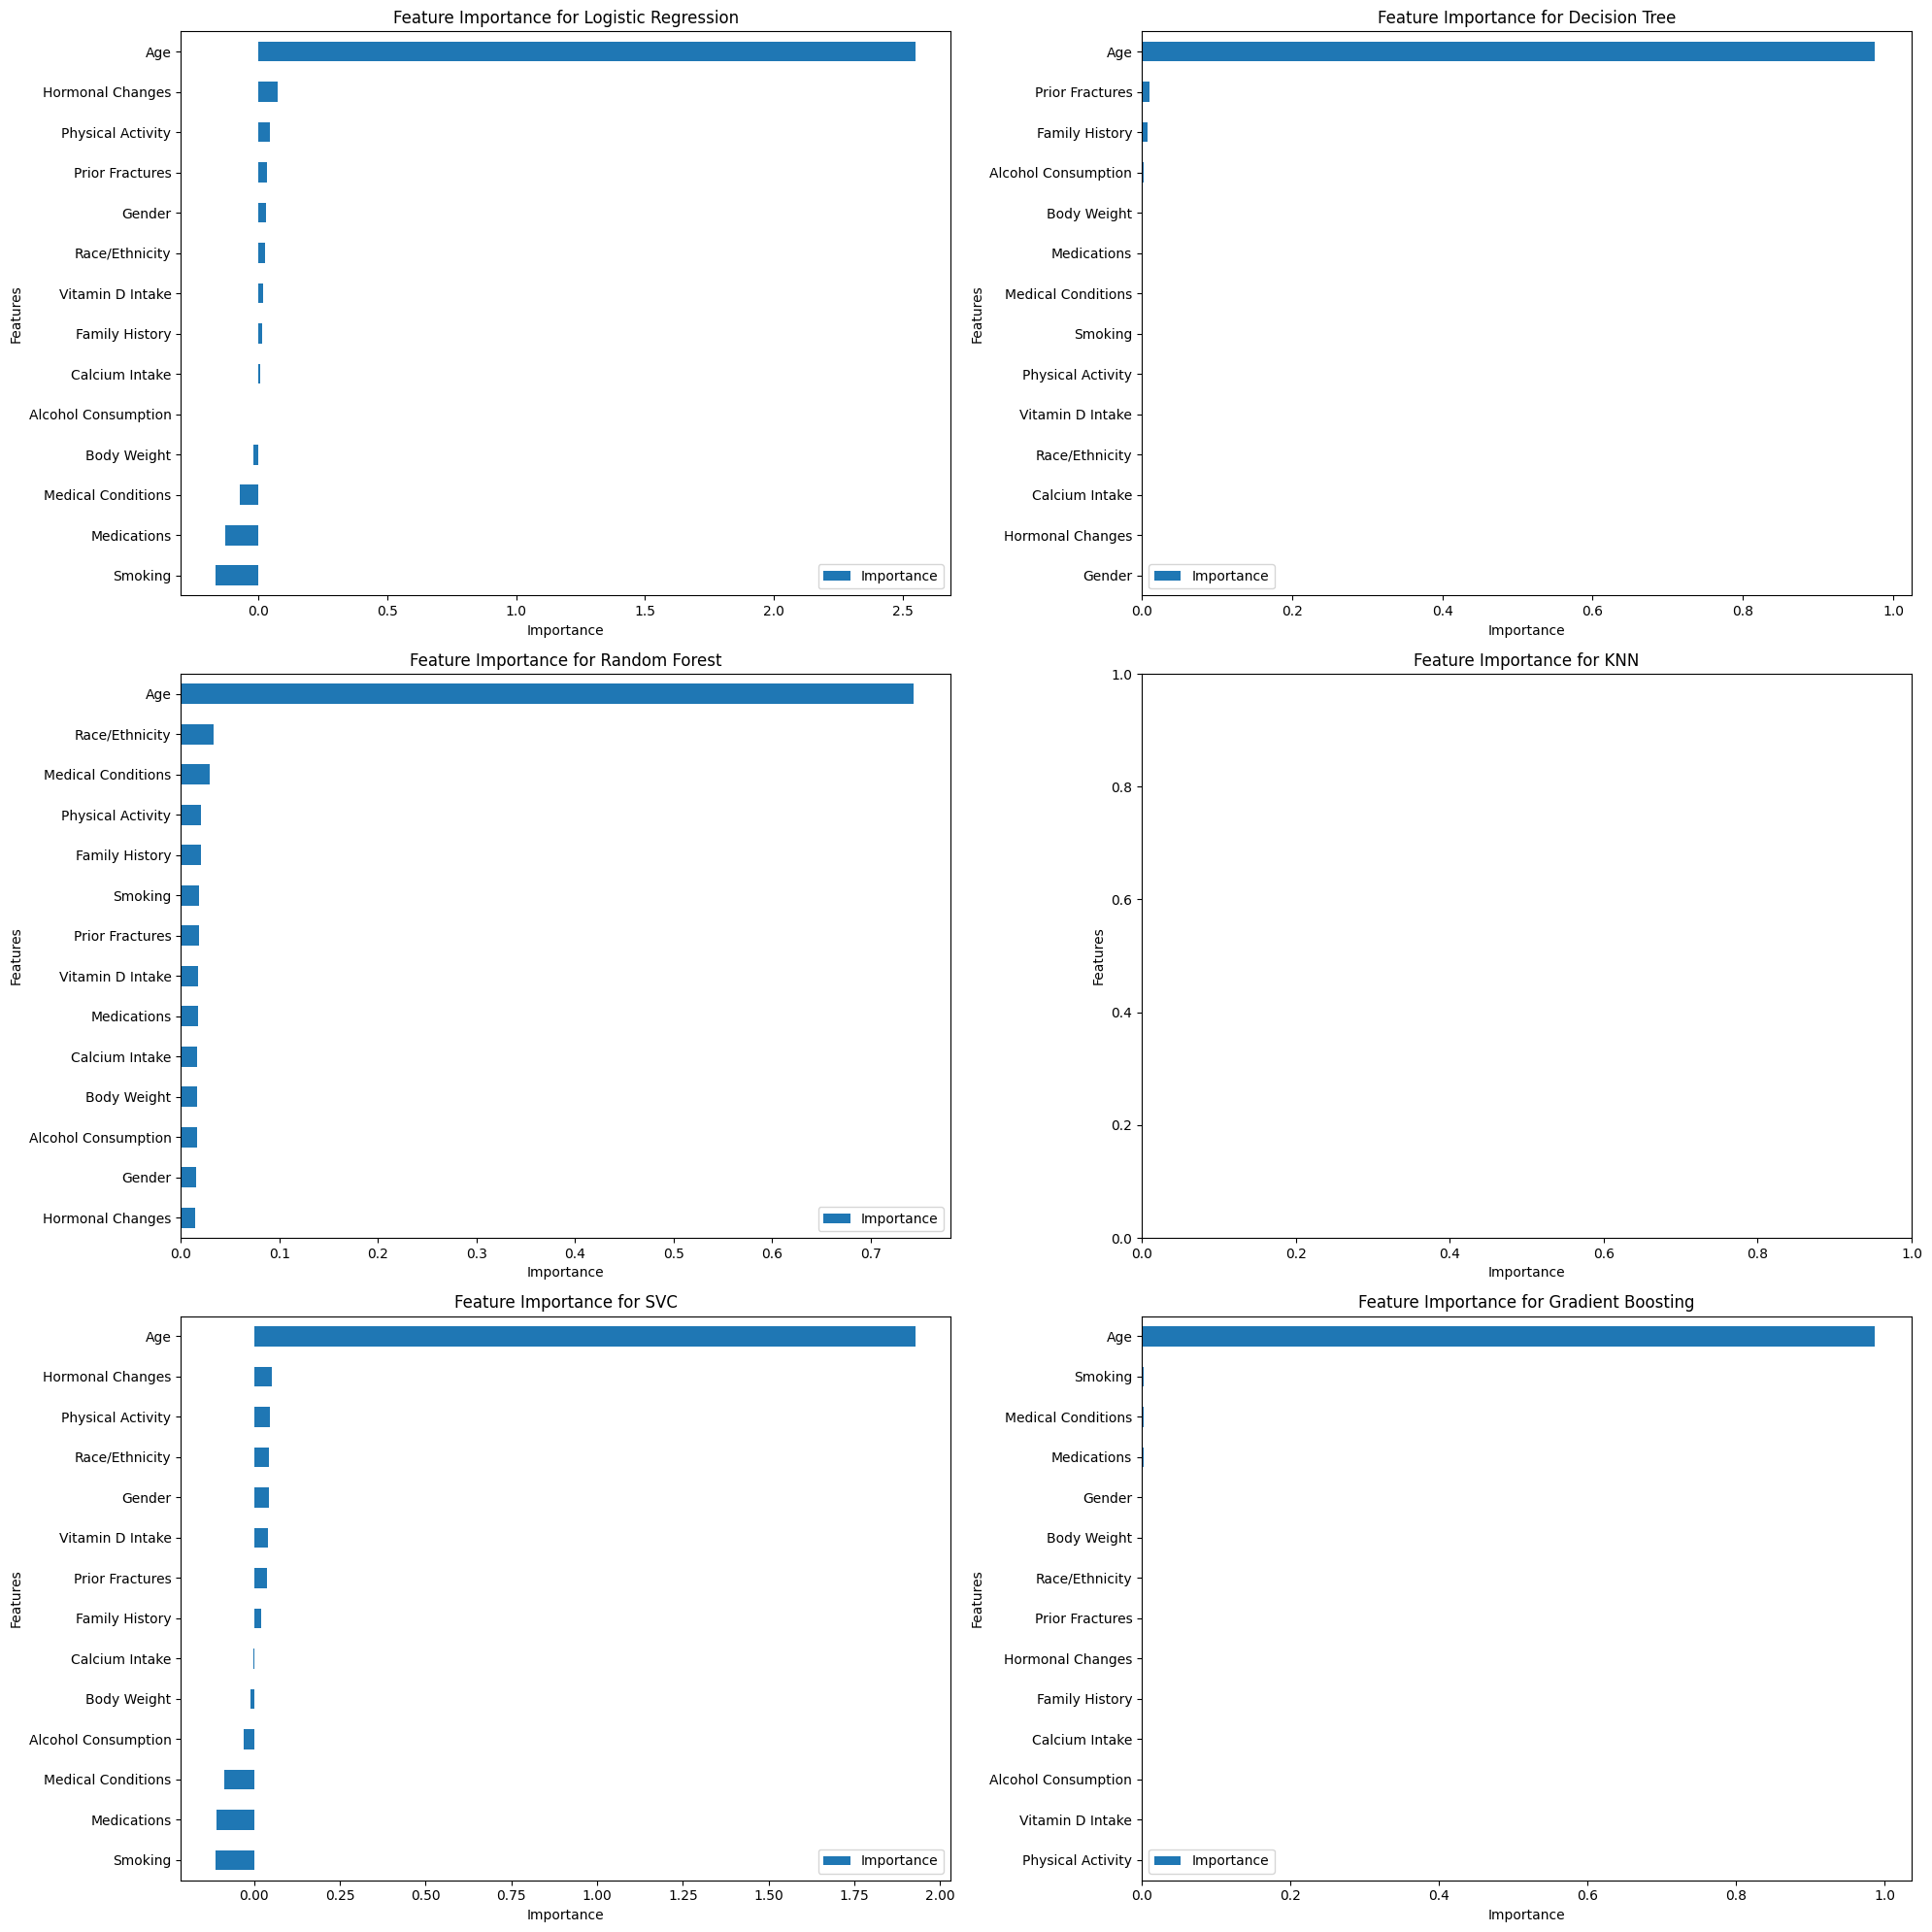

In [53]:
labels = df.drop('Osteoporosis', axis=1).columns

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Logistic Regression Features
coeff = best_lr.coef_[0]
features = pd.DataFrame({'Features': labels, 'Importance': coeff})
features.sort_values(by='Importance', ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance for Logistic Regression')
ax[0, 0].set_xlabel('Importance')
ax[0, 0].set_ylabel('Features')

# Decision Tree Features
importances = best_dt.feature_importances_
features = pd.DataFrame({'Features': labels, 'Importance': importances})
features.sort_values(by='Importance', ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Feature Importance for Decision Tree')
ax[0, 1].set_xlabel('Importance')
ax[0, 1].set_ylabel('Features')

# Random Forest Features
importances = best_rf.feature_importances_
features = pd.DataFrame({'Features': labels, 'Importance': importances})
features.sort_values(by='Importance', ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.plot(kind='barh', ax=ax[1, 0])
ax[1, 0].set_title('Feature Importance for Random Forest')
ax[1, 0].set_xlabel('Importance')
ax[1, 0].set_ylabel('Features')

# KNN Features using permutation importance
ax[1, 1].set_title('Feature Importance for KNN')
ax[1, 1].set_xlabel('Importance')
ax[1, 1].set_ylabel('Features')

# SVC Features
coeff = best_svc.coef_[0]
features = pd.DataFrame({'Features': labels, 'Importance': coeff})
features.sort_values(by='Importance', ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.plot(kind='barh', ax=ax[2, 0])
ax[2, 0].set_title('Feature Importance for SVC')
ax[2, 0].set_xlabel('Importance')
ax[2, 0].set_ylabel('Features')

# Gradient Boosting Features
importances = best_gb.feature_importances_
features = pd.DataFrame({'Features': labels, 'Importance': importances})
features.sort_values(by='Importance', ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.plot(kind='barh', ax=ax[2, 1])
ax[2, 1].set_title('Feature Importance for Gradient Boosting')
ax[2, 1].set_xlabel('Importance')
ax[2, 1].set_ylabel('Features')

plt.tight_layout()
plt.show()


## Conclusion

This project involved developing machine learning models to predict osteoporosis risk in patients using their medical records. The researchers conducted a comprehensive exploratory data analysis and employed six different machine learning algorithms: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbor (KNN), Support Vector Classifier (SVC), and Gradient Boosting.

The analysis identified significant factors influencing osteoporosis risk, including age, hormonal changes (such as menopause), specific medical conditions (e.g., hyperthyroidism and rheumatoid arthritis), lower body weight, calcium and vitamin D deficiencies, and sedentary lifestyles.  Patients below 40 years old were generally found to be at lower risk.

Among the models used, Gradient Boosting proved most effective, achieving a high accuracy of 92.01%. This model demonstrates promising potential as a tool for predicting osteoporosis risk based on patients' medical histories, allowing for early intervention and preventive strategies.